In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [17]:
df = pd.read_csv("crash.csv", encoding='windows-1252')

In [18]:
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [19]:
features = ["Master Record Number","Year", "Month", "Day", "Weekend?", "Hour", "Collision Type"]

In [20]:
df = df.dropna(subset=features)

In [21]:
df['Weekend?'] = df['Weekend?'].replace(['Weekend', 'Weekday'], [1, 0])
df['Weekend?'] = df['Weekend?'].astype(int)
df['Collision Type'] = df['Collision Type'].replace(['1-Car', '2-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Moped/Motorcycle', 'Bus'], [1, 2, 3, 4, 5, 6, 7])
df

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,0,0.0,2,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,0,1500.0,2,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,1,2300.0,2,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,1,900.0,2,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,1,1100.0,2,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...,...
53938,900084526,2003,10,6,0,1700.0,2,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,900089213,2003,11,3,0,800.0,1,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,900095322,2003,12,5,0,1200.0,2,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,900099922,2003,12,1,1,700.0,2,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [22]:
year = df.loc[:, 'Year']
month = df.loc[:, 'Month']
day = df.loc[:, 'Day']

In [23]:
years = []
months = []
days = []
for row in year:
    years.append(row)
    
for row in month:
    months.append(row)
    
for row in day:
    days.append(row)

In [24]:
data = df[features].copy()

In [25]:
data

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type
0,902363382,2015,1,5,0,0.0,2
1,902364268,2015,1,6,0,1500.0,2
2,902364412,2015,1,6,1,2300.0,2
3,902364551,2015,1,7,1,900.0,2
4,902364615,2015,1,7,1,1100.0,2
...,...,...,...,...,...,...,...
53938,900084526,2003,10,6,0,1700.0,2
53939,900089213,2003,11,3,0,800.0,1
53940,900095322,2003,12,5,0,1200.0,2
53941,900099922,2003,12,1,1,700.0,2


In [26]:
data = ((data-data.min())/(data.max()-data.min()))*9+1

In [27]:
data.describe()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type
count,53712.000000,53712.000000,53712.000000,53712.000000,53712.000000,53712.000000,53712.000000
mean,7.756070,5.491943,5.635617,5.795213,3.216153,6.271980,2.606792
std,3.880215,2.837556,2.875100,2.863372,3.877412,2.080336,1.545620
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.973881,3.250000,3.454545,4.000000,1.000000,4.913043,2.500000
50%,9.984946,5.500000,5.909091,5.500000,1.000000,6.478261,2.500000
75%,9.992695,7.750000,8.363636,8.500000,1.000000,7.652174,2.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [28]:
data.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type
0,9.997248,10.0,1.0,7.0,1.0,1.000000,2.5
1,9.997257,10.0,1.0,8.5,1.0,6.869565,2.5
2,9.997258,10.0,1.0,8.5,10.0,10.000000,2.5
3,9.997259,10.0,1.0,10.0,10.0,4.521739,2.5
4,9.997260,10.0,1.0,10.0,10.0,5.304348,2.5


KMeans

In [29]:
kmeans = KMeans(n_clusters = 6).fit(data)
kmeans.labels_
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5]),
 array([14046,  6694, 16318,  3239, 10122,  3293], dtype=int64))

In [30]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(data)
tsne.shape

(53712, 2)

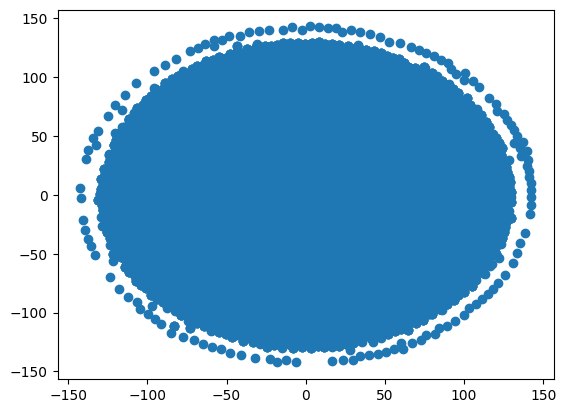

In [31]:
plt.scatter(tsne[:,0], tsne[:,1])

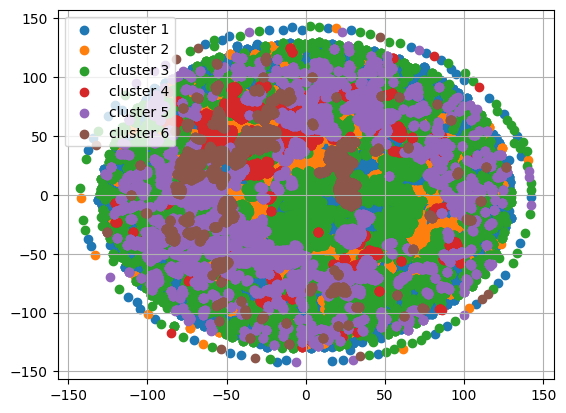

In [46]:
plt.scatter(tsne[kmeans.labels_ == 0, 0], tsne[kmeans.labels_ == 0, 1], label = 'cluster 1')
plt.scatter(tsne[kmeans.labels_ == 1, 0], tsne[kmeans.labels_ == 1, 1], label = 'cluster 2')
plt.scatter(tsne[kmeans.labels_ == 2, 0], tsne[kmeans.labels_ == 2, 1], label = 'cluster 3')
plt.scatter(tsne[kmeans.labels_ == 3, 0], tsne[kmeans.labels_ == 3, 1], label = 'cluster 4')
plt.scatter(tsne[kmeans.labels_ == 4, 0], tsne[kmeans.labels_ == 4, 1], label = 'cluster 5')
plt.scatter(tsne[kmeans.labels_ == 5, 0], tsne[kmeans.labels_ == 5, 1], label = 'cluster 6')
plt.legend(scatterpoints=1)
plt.grid()

In [32]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_)

print(distortions)

[3293771.041189157, 2258566.0141462185, 1634655.1463082875, 1428980.5660454368, 1238518.9121258345, 1066528.1287880563, 999914.4589958729, 942738.01103795, 911537.0838667796, 846626.37288304]


In [33]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

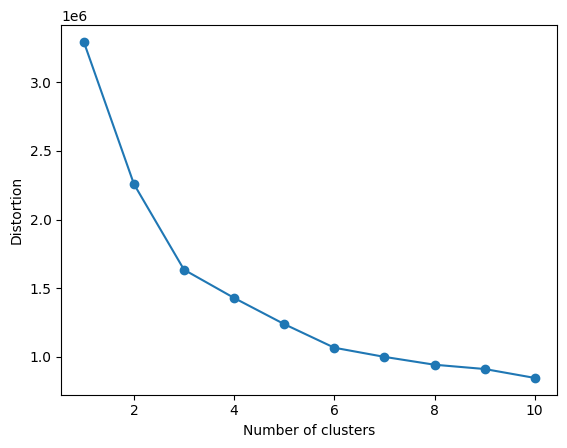

In [34]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()